<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/6_4%20%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(Conv1D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

max_len = 350

pad_X_train = pad_sequences(x_train, maxlen = max_len)
pad_X_test = pad_sequences(x_test, maxlen = max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))

model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))

model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - acc: 0.6517 - loss: 0.5729 - val_acc: 0.8670 - val_loss: 0.3096
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - acc: 0.9204 - loss: 0.2123 - val_acc: 0.8798 - val_loss: 0.2982
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - acc: 0.9656 - loss: 0.1086 - val_acc: 0.8732 - val_loss: 0.3482
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - acc: 0.9884 - loss: 0.0478 - val_acc: 0.8640 - val_loss: 0.4892
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - acc: 0.9967 - loss: 0.0173 - val_acc: 0.8668 - val_loss: 0.5764
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - acc: 0.9996 - loss: 0.0048 - val_acc: 0.8688 - val_loss: 0.6506
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - acc: 0.9999 - loss: 0.0022 - val_acc: 0.8682 - val_loss: 0.6962
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - acc: 0.9999 - loss: 0.0013 - val_acc: 0.8686 - val_loss: 0.7350
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 

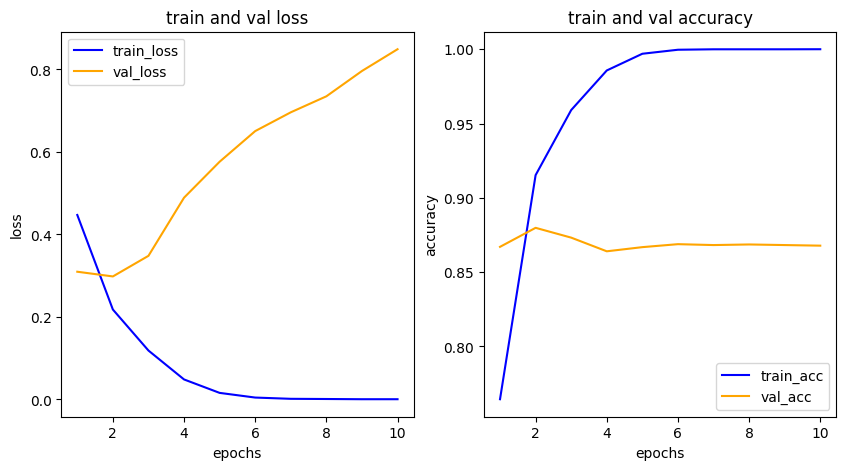

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙음

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# Conv1D + LSTM

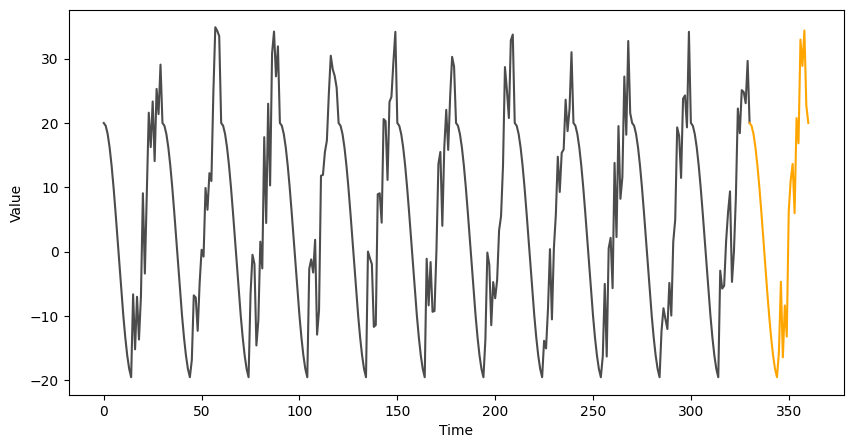

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time <0.5, np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time)+np.random.random(361))

plt.figure(figsize = (10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
# 학습용 데이터
plt.plot(np.arange(0, 30 * 11 + 1),
         time_series[:30 * 11 + 1],
         color = 'black', alpha = 0.7)
# 테스트용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1),
         time_series[30 * 11:],
         color = 'orange')

In [ ]:
def make_sequence(time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i + n)]
    if (i + n) < len(time_series):
      x_train.append(x)
      y_train.append(time_series[i + n])
    else:
      break

  return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Input
from tensorflow.keras.layers import LSTM

model = Sequential()

model.add(Input(shape=(10, 1)))
model.add(Conv1D(32, 3, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))
# LSTM을 혼합하여 모델을 구성
model.add(LSTM(32,dropout = 0.2, recurrent_dropout = 0.2, activation = 'tanh'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 259.8134 - mse: 259.8134
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 228.1255 - mse: 228.1255
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 196.2288 - mse: 196.2288
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185.3926 - mse: 185.3926
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 156.8844 - mse: 156.8844
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 133.1996 - mse: 133.1996
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 123.7696 - mse: 123.7696
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 113.4795 - mse: 113.4795
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 115.2800 - mse: 115.2800
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 97.7961 - mse: 97.7961
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 88.3105 - mse: 88.3105
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 90.5440 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


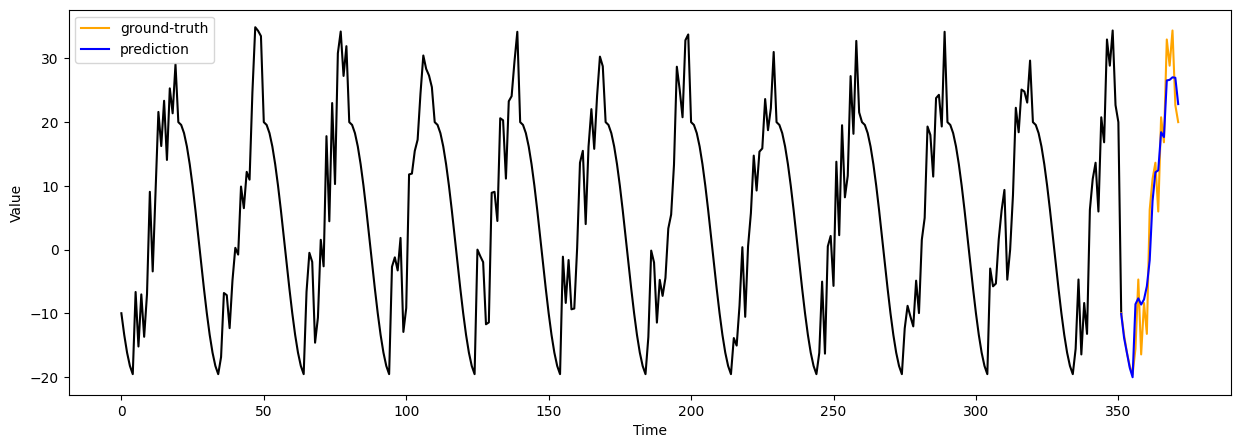

In [ ]:
pred = model.predict(x_test)

train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize = (15, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color = 'orange', label='ground-truth')
plt.plot(pred_range, pred, color ='blue', label='prediction')
plt.legend()
plt.show()